In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers


# Handwritten Digit Recognition using CNN and MLP

## Objective
The objective of this experiment is to classify handwritten digits from the MNIST dataset using Convolutional Neural Networks (CNN) and Multi-Layer Perceptron (MLP). Different activation functions, optimizers, batch normalization, and dropout configurations are analyzed.

## Dataset
MNIST dataset contains 60,000 training images and 10,000 testing images of handwritten digits (0–9).

## Experiments Performed

### Task 1: Activation Function Comparison
- Sigmoid
- Tanh
- ReLU

Observation:
- Sigmoid converges slowly due to vanishing gradient problem.
- Tanh performs better than Sigmoid but still slower than ReLU.
- ReLU converges fastest and gives better accuracy.

### Task 2: Optimizer Comparison
- SGD
- SGD with Momentum
- Adam

Observation:
- SGD is slow and unstable.
- Momentum improves convergence stability.
- Adam reaches high accuracy fastest.

### Task 3: Batch Normalization and Dropout
- No BN and no Dropout
- Dropout = 0.1 without BN
- BN with Dropout = 0.25

Observation:
- BN improves stability and speed of training.
- Dropout reduces overfitting.

## Conclusion
ReLU activation with Adam optimizer and Batch Normalization provides the best accuracy and fastest convergence.

## Author
Sweta Rana
AI Department, SVNIT Surat


In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize (0–255 → 0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# CNN needs channel dimension
x_train_cnn = x_train[..., np.newaxis]
x_test_cnn = x_test[..., np.newaxis]

print("Training shape:", x_train_cnn.shape)
print("Testing shape:", x_test_cnn.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training shape: (60000, 28, 28, 1)
Testing shape: (10000, 28, 28, 1)


In [3]:
def build_cnn(activation="relu", optimizer="adam", use_bn=True, dropout_rate=0.25):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3,3), activation=activation, input_shape=(28,28,1)))
    model.add(layers.Conv2D(64, (3,3), activation=activation))
    model.add(layers.MaxPooling2D((2,2)))

    if use_bn:
        model.add(layers.BatchNormalization())

    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation=activation))
    model.add(layers.Dense(10, activation="softmax"))

    if optimizer == "sgd":
        opt = optimizers.SGD()
    elif optimizer == "momentum":
        opt = optimizers.SGD(momentum=0.9)
    else:
        opt = optimizers.Adam()

    model.compile(
        optimizer=opt,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model


In [4]:
def build_mlp(hidden_layers=[256], activation="relu", optimizer="adam", use_bn=True, dropout_rate=0.25):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))

    for units in hidden_layers:
        model.add(layers.Dense(units, activation=activation))
        if use_bn:
            model.add(layers.BatchNormalization())
        model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(10, activation="softmax"))

    if optimizer == "sgd":
        opt = optimizers.SGD()
    elif optimizer == "momentum":
        opt = optimizers.SGD(momentum=0.9)
    else:
        opt = optimizers.Adam()

    model.compile(
        optimizer=opt,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model


In [5]:
results = []

def run_experiment(model, name, epochs=5, is_cnn=True):
    if is_cnn:
        history = model.fit(x_train_cnn, y_train,
                            validation_data=(x_test_cnn, y_test),
                            epochs=epochs, batch_size=128, verbose=1)
    else:
        history = model.fit(x_train, y_train,
                            validation_data=(x_test, y_test),
                            epochs=epochs, batch_size=128, verbose=1)

    test_loss, test_acc = model.evaluate(
        x_test_cnn if is_cnn else x_test,
        y_test, verbose=0)

    results.append({
        "Experiment": name,
        "Final Accuracy": round(test_acc*100, 2)
    })

    return history


In [6]:
hist_sigmoid = run_experiment(
    build_cnn(activation="sigmoid"),
    "CNN-Sigmoid", epochs=5)

hist_tanh = run_experiment(
    build_cnn(activation="tanh"),
    "CNN-Tanh", epochs=5)

hist_relu = run_experiment(
    build_cnn(activation="relu"),
    "CNN-ReLU", epochs=5)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8821 - loss: 0.4210 - val_accuracy: 0.4536 - val_loss: 1.8661
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9804 - loss: 0.0749 - val_accuracy: 0.4317 - val_loss: 2.5593
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9884 - loss: 0.0459 - val_accuracy: 0.4258 - val_loss: 3.3247
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9909 - loss: 0.0342 - val_accuracy: 0.9676 - val_loss: 0.1022
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9930 - loss: 0.0276 - val_accuracy: 0.9216 - val_loss: 0.2546
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8967 - loss: 0.3780 - val_accuracy: 0.6274 - val_loss: 1.3824
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9785 - loss: 0.0744 - val_accuracy: 0.8028 - val_loss: 0.6500
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9834 - loss: 0.0575 - val_accuracy: 0.7995

In [7]:
hist_no_bn = run_experiment(
    build_cnn(use_bn=False, dropout_rate=0.0),
    "No-BN-No-Dropout", epochs=5)

hist_low_dropout = run_experiment(
    build_cnn(use_bn=False, dropout_rate=0.1),
    "Dropout-0.1", epochs=5)

hist_full = run_experiment(
    build_cnn(use_bn=True, dropout_rate=0.25),
    "BN-Dropout-0.25", epochs=5)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9036 - loss: 0.3330 - val_accuracy: 0.9837 - val_loss: 0.0503
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9868 - loss: 0.0438 - val_accuracy: 0.9852 - val_loss: 0.0437
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9921 - loss: 0.0255 - val_accuracy: 0.9880 - val_loss: 0.0348
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9943 - loss: 0.0179 - val_accuracy: 0.9853 - val_loss: 0.0454
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9957 - loss: 0.0128 - val_accuracy: 0.9907 - val_loss: 0.0295
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.8937 - loss: 0.3487 - val_accuracy: 0.9800 - val_loss: 0.0567
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9862 - loss: 0.0471 - val_accuracy: 0.9870 - val_loss: 0.0400
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9907 - loss: 0.0294 - val_accuracy: 0.9872 -

In [8]:
hist_sgd = run_experiment(
    build_cnn(activation="relu", optimizer="sgd"),
    "CNN-SGD", epochs=5)

hist_momentum = run_experiment(
    build_cnn(activation="relu", optimizer="momentum"),
    "CNN-Momentum", epochs=5)

hist_adam = run_experiment(
    build_cnn(activation="relu", optimizer="adam"),
    "CNN-Adam", epochs=5)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.8595 - loss: 0.4563 - val_accuracy: 0.9683 - val_loss: 0.2018
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9695 - loss: 0.1028 - val_accuracy: 0.9798 - val_loss: 0.0662
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9796 - loss: 0.0686 - val_accuracy: 0.9832 - val_loss: 0.0512
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9827 - loss: 0.0585 - val_accuracy: 0.9858 - val_loss: 0.0427
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9862 - loss: 0.0479 - val_accuracy: 0.9867 - val_loss: 0.0420
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9060 - loss: 0.2962 - val_accuracy: 0.9827 - val_loss: 0.0842
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9866 - loss: 0.0428 - val_accuracy: 0.9887 - val_loss: 0.0365
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9918 - loss: 0.0254 - val_accuracy: 0.9894 -

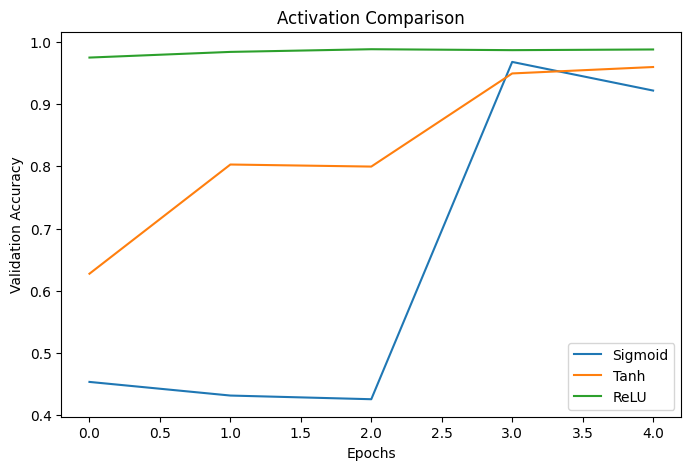

In [9]:
def plot_history(histories, title):
    plt.figure(figsize=(8,5))
    for name, hist in histories.items():
        plt.plot(hist.history['val_accuracy'], label=name)
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Validation Accuracy")
    plt.legend()
    plt.show()

plot_history({
    "Sigmoid": hist_sigmoid,
    "Tanh": hist_tanh,
    "ReLU": hist_relu
}, "Activation Comparison")


In [10]:
df = pd.DataFrame(results)
df


,Experiment,Final Accuracy
0,CNN-Sigmoid,92.16
1,CNN-Tanh,95.94
2,CNN-ReLU,98.76
3,No-BN-No-Dropout,99.07
4,Dropout-0.1,98.64
5,BN-Dropout-0.25,98.74
6,CNN-SGD,98.67
7,CNN-Momentum,98.99
8,CNN-Adam,98.68
